**• DOMAIN:** Autonomous Vehicles

**• CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

**• DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.

The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.

**• PROJECT OBJECTIVE:** To build a digit classifier on the SVHN (Street View Housing Number) dataset.

## Steps and tasks: [ Total Score: 30 Marks]

### 1. Data Import and Exploration [5 Marks]

In [27]:
# Import Libraries and packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import h5py

##### A. Read the .h5 file and assign to a variable. [2 Marks]

In [28]:
# Read the dataset
h5_df = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

##### B. Print all the keys from the .h5 file. [1 Marks]

In [29]:
h5_df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

##### C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

In [30]:
X_train = h5_df['X_train'][:]
y_train = h5_df['y_train'][:]
X_test = h5_df['X_test'][:]
y_test = h5_df['y_test'][:]
X_val = h5_df['X_val'][:]
y_val = h5_df['y_val'][:]

In [31]:
X_train[:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [32]:
y_train[:1]

array([2], dtype=uint8)

### 2. Data Visualisation and preprocessing [13 Marks]

##### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


##### B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

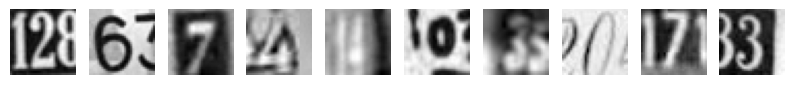

Labels: [2 6 7 4 4 0 3 0 7 3]


In [34]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('Labels: %s' % (y_train[0:10]))

##### C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

In [35]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

##### D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

In [36]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Normalised Train data', X_train.shape, y_train.shape)
print('Normalised Test data', X_test.shape, y_test.shape)

Normalised Train data (42000, 1024, 1) (42000,)
Normalised Test data (18000, 1024, 1) (18000,)


##### E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [37]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##### F. Print total Number of classes in the Dataset. [1 Marks]

In [38]:
no_class = y_test.shape[1] 
print("Total No. of Classes:",no_class)

Total No. of Classes: 10


### 3. Model Training & Evaluation using Neural Network [12 Marks]

##### A. Design a Neural Network to train a classifier. [3 Marks]

In [39]:
image_class_nn = Sequential()  
image_class_nn.add(Flatten())
image_class_nn.add(Dense(256, activation='relu'))
image_class_nn.add(Dense(64, activation='relu'))
image_class_nn.add(Dense(64, activation='relu'))
image_class_nn.add(Dense(32, activation='relu'))
image_class_nn.add(Dense(no_class, activation='softmax'))

In [40]:
sgd = optimizers.Adam(learning_rate=0.001)

image_class_nn.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

##### B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]

In [41]:
train_model = image_class_nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 5s - 37ms/step - accuracy: 0.1085 - loss: 2.3012 - val_accuracy: 0.1328 - val_loss: 2.2682
Epoch 2/100
140/140 - 3s - 22ms/step - accuracy: 0.1827 - loss: 2.1666 - val_accuracy: 0.2415 - val_loss: 2.0524
Epoch 3/100
140/140 - 3s - 21ms/step - accuracy: 0.3557 - loss: 1.8283 - val_accuracy: 0.4604 - val_loss: 1.5948
Epoch 4/100
140/140 - 5s - 36ms/step - accuracy: 0.4783 - loss: 1.5385 - val_accuracy: 0.5276 - val_loss: 1.4429
Epoch 5/100
140/140 - 5s - 37ms/step - accuracy: 0.5438 - loss: 1.3902 - val_accuracy: 0.5779 - val_loss: 1.3234
Epoch 6/100
140/140 - 3s - 21ms/step - accuracy: 0.5816 - loss: 1.2946 - val_accuracy: 0.5983 - val_loss: 1.2620
Epoch 7/100
140/140 - 5s - 37ms/step - accuracy: 0.6086 - loss: 1.2220 - val_accuracy: 0.6044 - val_loss: 1.2253
Epoch 8/100
140/140 - 5s - 37ms/step - accuracy: 0.6190 - loss: 1.1928 - val_accuracy: 0.6394 - val_loss: 1.1475
Epoch 9/100
140/140 - 5s - 37ms/step - accuracy: 0.6382 - loss: 1.1445 - val_accuracy: 0.6461 - 

Epoch 73/100
140/140 - 5s - 37ms/step - accuracy: 0.8430 - loss: 0.5060 - val_accuracy: 0.7978 - val_loss: 0.6992
Epoch 74/100
140/140 - 5s - 35ms/step - accuracy: 0.8404 - loss: 0.5135 - val_accuracy: 0.8038 - val_loss: 0.6754
Epoch 75/100
140/140 - 3s - 20ms/step - accuracy: 0.8418 - loss: 0.5115 - val_accuracy: 0.8038 - val_loss: 0.6803
Epoch 76/100
140/140 - 5s - 37ms/step - accuracy: 0.8423 - loss: 0.5030 - val_accuracy: 0.8069 - val_loss: 0.6642
Epoch 77/100
140/140 - 5s - 37ms/step - accuracy: 0.8483 - loss: 0.4895 - val_accuracy: 0.8065 - val_loss: 0.6595
Epoch 78/100
140/140 - 5s - 34ms/step - accuracy: 0.8469 - loss: 0.4928 - val_accuracy: 0.8063 - val_loss: 0.6611
Epoch 79/100
140/140 - 3s - 22ms/step - accuracy: 0.8451 - loss: 0.4940 - val_accuracy: 0.8054 - val_loss: 0.6742
Epoch 80/100
140/140 - 5s - 36ms/step - accuracy: 0.8456 - loss: 0.4951 - val_accuracy: 0.8078 - val_loss: 0.6623
Epoch 81/100
140/140 - 3s - 18ms/step - accuracy: 0.8486 - loss: 0.4868 - val_accuracy: 

##### C. Evaluate performance of the model with appropriate metrics. [2 Marks]

In [42]:
scores = image_class_nn.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6692947149276733
Accuracy: 0.8091111183166504


##### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. [4 Marks]

<Figure size 640x480 with 0 Axes>

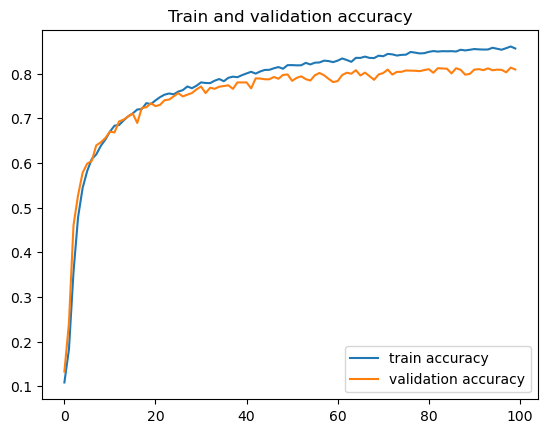

<Figure size 640x480 with 0 Axes>

In [43]:
acc_train  = train_model.history['accuracy']
acc_val  = train_model.history['val_accuracy']

eps   = range(len(acc_train))

plt.plot  ( eps, acc_train, label = 'train accuracy' )
plt.plot  ( eps, acc_val, label = 'validation accuracy' )
plt.title ('Train and validation accuracy')
plt.legend()
plt.figure()

Text(0.5, 1.0, 'Train and validation loss')

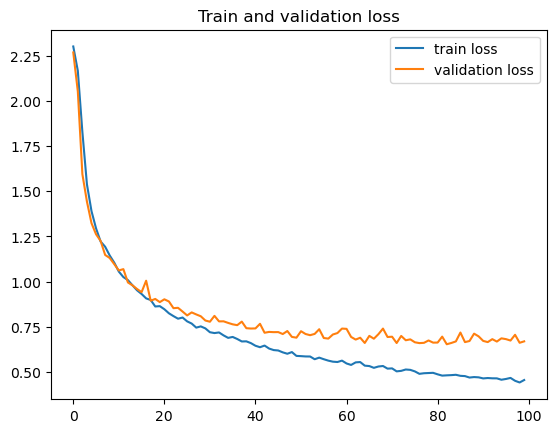

In [44]:
loss_train     = train_model.history['loss']
loss_valid = train_model.history['val_loss']
eps   = range(len(loss_train))
plt.plot  ( eps, loss_train, label = 'train loss' )
plt.plot  ( eps, loss_valid, label = 'validation loss' )
plt.legend()
plt.title ('Train and validation loss'   )

**Observation:** 
1. Train Loss is lower than Validation loss and Vice vorsa in case of Accuracy.
2. As the number of Epochs are increasing loss is decreasing and Accuracy is increasing.
3. After 60 epochs, Accuracy and loss for validation dataset is more stablising.